# Perceptrons

### Outline
In this notebook, we will do the following:

1. (5 mins) Discuss how to view parametric models as approximations to a "ground truth" function in some function space.
    - Polynomials (Lagrange interpolation/ Stone-Weierstrass theorem)
    - Neural networks (universal approximation theorem)
2. (5 mins) Discuss the historical context of perceptrons, and how they are inspired by biological neurons.
    - Biological binary classification problem - to fire or not to fire?
3. (20 mins) Define the perceptron model, and how to visualize different activation functions:
    - Heaviside step function
    - Sigmoid function
    - ReLU function
    - Tanh function
4. (10 mins) Implement perceptrons in Python to solve AND, OR, and NOT problems.
5. (5 mins) Discuss the AI winter caused by the inability of perceptrons to solve the XOR problem.
6. (25 mins) Define the multilayer perceptron (MLP) model.
    - Discuss the concept of hidden layers and how they enable the MLP to learn more complex functions.
    - Discuss the concept of backpropagation and how it enables the MLP to learn from data.
    - Implement a simple MLP from scratch to solve the XOR problem.
    - Implement a simple MLP using PyTorch to solve the XOR problem.
    - Compare the performance of the two implementations.
7. (5 mins) Discuss the limitations of MLPs, and how they can be overcome with more advanced architectures.

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Set device (use GPU if available)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Load and preprocess MNIST dataset
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert images to PyTorch tensors
    # transforms.Normalize((0.1307,), (0.3081,))  # Normalize using mean and std of MNIST
])

# Download and load training data
train_dataset = torchvision.datasets.MNIST(root='./data', 
                                          train=True, 
                                          download=True, 
                                          transform=transform)

# Create data loader for batching and shuffling
train_loader = torch.utils.data.DataLoader(train_dataset, 
                                          batch_size=64, 
                                          shuffle=True)

# Download and load test data
test_dataset = torchvision.datasets.MNIST(root='./data', 
                                         train=False, 
                                         download=True, 
                                         transform=transform)

test_loader = torch.utils.data.DataLoader(test_dataset, 
                                         batch_size=1000, 
                                         shuffle=False)

Using device: cpu
Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9.91M/9.91M [01:09<00:00, 142kB/s] 


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28.9k/28.9k [00:00<00:00, 278kB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1.65M/1.65M [00:00<00:00, 2.57MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4.54k/4.54k [00:00<00:00, 3.01MB/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [59]:
for i in range(5):
    print(train_dataset[i][0].shape, train_dataset[i][1])

torch.Size([1, 28, 28]) 5
torch.Size([1, 28, 28]) 0
torch.Size([1, 28, 28]) 4
torch.Size([1, 28, 28]) 1
torch.Size([1, 28, 28]) 9


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Updated function to accept an axes object
def imshow(ax, img, title):
    npimg = img.numpy()
    ax.imshow(np.transpose(npimg, (1, 2, 0)), cmap='gray')
    ax.set_title(title)
    ax.axis('off')

# Get the next batch of images and labels from the data loader
dataiter = iter(train_loader)
images, labels = next(dataiter)

In [35]:
# display some information about the variable images
print(f"Images shape: {images.shape}")
print(f"Labels shape: {labels.shape}")
print(f"Labels: {labels}")

train_tensors = train_dataset.data
test_set = test_loader.dataset.data

Images shape: torch.Size([64, 1, 28, 28])
Labels shape: torch.Size([64])
Labels: tensor([3, 4, 7, 1, 7, 9, 3, 2, 7, 5, 7, 7, 9, 3, 8, 4, 1, 1, 2, 1, 8, 9, 6, 0,
        7, 7, 3, 6, 6, 6, 5, 6, 2, 4, 8, 3, 8, 3, 0, 3, 4, 8, 8, 3, 1, 9, 2, 8,
        7, 7, 1, 4, 6, 8, 3, 5, 2, 4, 8, 3, 6, 2, 5, 4])


In [41]:
train_dataset.data == train_set

tensor([[[True, True, True,  ..., True, True, True],
         [True, True, True,  ..., True, True, True],
         [True, True, True,  ..., True, True, True],
         ...,
         [True, True, True,  ..., True, True, True],
         [True, True, True,  ..., True, True, True],
         [True, True, True,  ..., True, True, True]],

        [[True, True, True,  ..., True, True, True],
         [True, True, True,  ..., True, True, True],
         [True, True, True,  ..., True, True, True],
         ...,
         [True, True, True,  ..., True, True, True],
         [True, True, True,  ..., True, True, True],
         [True, True, True,  ..., True, True, True]],

        [[True, True, True,  ..., True, True, True],
         [True, True, True,  ..., True, True, True],
         [True, True, True,  ..., True, True, True],
         ...,
         [True, True, True,  ..., True, True, True],
         [True, True, True,  ..., True, True, True],
         [True, True, True,  ..., True, True, True]],

In [42]:
#plot the first image in the trainining dataste
fig, ax = plt.subplots(1, 1, figsize=(4, 4))


AttributeError: 'MNIST' object has no attribute 'images'

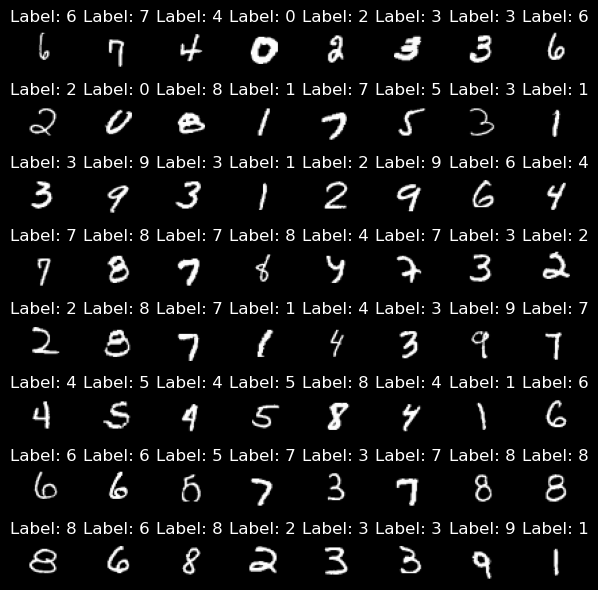

In [23]:
# Randomly sample 64 indices
indices = torch.randperm(images.shape[0])[:64]
sampled_images = images[indices]
sampled_labels = labels[indices]

# Create a grid of images (8x8 grid for 64 images)
grid_size = 8
fig, axes = plt.subplots(grid_size, grid_size, figsize=(6,6))

# Loop over the grid and plot each image on its corresponding axes
for idx in range(64):
    i = idx // grid_size
    j = idx % grid_size
    imshow(axes[i, j], sampled_images[idx], title=f'Label: {sampled_labels[idx].item()}')

plt.tight_layout()
plt.show()

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

# XOR dataset
X = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
y = torch.tensor([[0], [1], [1], [0]], dtype=torch.float32)

# Define the MLP model
class XORMLP(nn.Module):
    def __init__(self):
        super(XORMLP, self).__init__()
        self.hidden = nn.Linear(2, 2)  # Two neurons in hidden layer
        self.output = nn.Linear(2, 1)  # One neuron in output layer
        self.activation = nn.Tanh()    # Non-linear activation for hidden layer
        self.final_activation = nn.Sigmoid()  # Sigmoid for binary classification

    def forward(self, x):
        x = self.activation(self.hidden(x))
        x = self.final_activation(self.output(x))
        return x

# Initialize model
model = XORMLP()

# Loss and optimizer
criterion = nn.BCELoss()  # Binary Cross Entropy Loss
optimizer = optim.SGD(model.parameters(), lr=0.1)

# Training loop
epochs = 10000
for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = model(X)
    loss = criterion(outputs, y)
    loss.backward()
    optimizer.step()
    
    if epoch % 1000 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item():.4f}')

# Test the model
with torch.no_grad():
    predictions = model(X)
    print("Predictions:", predictions.round().squeeze().tolist())

In [ ]:
# Define a simple CNN model
class MNISTConvNet(nn.Module):
    """
    A Convolutional Neural Network (CNN) model for MNIST digit classification.
    
    This model consists of two convolutional layers followed by max pooling,
    and two fully connected layers. It is designed to classify 28x28 grayscale
    images of handwritten digits (0-9).
    
    Example:
        # Create the model and move it to available device
        model = MNISTConvNet().to(device)
        
        # Define loss function and optimizer
        criterion = nn.CrossEntropyLoss()
        optimizer = optim.Adam(model.parameters(), lr=0.001)
        
        # Forward pass
        outputs = model(images)
        
        # Calculate loss and backpropagate
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
    """
    def __init__(self):
        super(MNISTConvNet, self).__init__()
        # First convolutional layer: 1 input channel (grayscale), 32 output channels, 3x3 kernel
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        # Max pooling layer: 2x2 window with stride 2
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        # Second convolutional layer: 32 input channels, 64 output channels, 3x3 kernel
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        # First fully connected layer: 64 * 7 * 7 input features, 128 output features
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        # Second fully connected layer: 128 input features, 10 output features (one for each digit)
        self.fc2 = nn.Linear(128, 10)
        # Activation functions
        self.relu = nn.ReLU()

    def forward(self, x):
        """
        Forward pass of the neural network.
        
        Args:
            x (torch.Tensor): Input tensor of shape (batch_size, 1, 28, 28)
            
        Returns:
            torch.Tensor: Output tensor of shape (batch_size, 10) with logits for each digit class
        """
        # First convolutional layer followed by ReLU and max pooling
        x = self.pool(self.relu(self.conv1(x)))  # Output: 32 x 14 x 14
        # Second convolutional layer followed by ReLU and max pooling
        x = self.pool(self.relu(self.conv2(x)))  # Output: 64 x 7 x 7
        # Flatten the tensor for the fully connected layers
        x = x.view(-1, 64 * 7 * 7)
        # First fully connected layer with ReLU
        x = self.relu(self.fc1(x))
        # Second fully connected layer (no activation - it's applied in the loss function)
        x = self.fc2(x)
        return x

In [ ]:
# Create the model and move it to the device (GPU or CPU)
model = MNISTConvNet().to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
# Training loop
num_epochs = 5
train_losses = []
test_accuracies = []

for epoch in range(num_epochs):
    model.train()  # Set model to training mode
    running_loss = 0.0
    
    for i, (inputs, labels) in enumerate(train_loader):
        # Move inputs and labels to device
        inputs, labels = inputs.to(device), labels.to(device)
        
        # Zero the gradients
        optimizer.zero_grad()
        
        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        
        # Backward pass and optimize
        loss.backward()
        optimizer.step()
        
        # Update statistics
        running_loss += loss.item()
        
        if (i+1) % 100 == 0:  # Print every 100 mini-batches
            print(f'Epoch [{epoch+1}/{num_epochs}], Batch [{i+1}/{len(train_loader)}], Loss: {loss.item():.4f}')
    
    # Calculate average loss for this epoch
    avg_loss = running_loss / len(train_loader)
    train_losses.append(avg_loss)
    
    # Evaluate on test set after each epoch
    model.eval()  # Set model to evaluation mode
    correct = 0
    total = 0
    
    with torch.no_grad():  # No need to track gradients during evaluation
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    accuracy = 100 * correct / total
    test_accuracies.append(accuracy)
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}, Test Accuracy: {accuracy:.2f}%')

print('Training finished!')

In [ ]:
# Plot training loss and test accuracy
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(train_losses)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(test_accuracies)
plt.title('Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')

plt.tight_layout()
plt.show()

In [ ]:
# Test with a few examples and visualize predictions
def visualize_predictions(model, dataloader, num_images=5):
    # Get a batch of test images
    dataiter = iter(dataloader)
    images, labels = next(dataiter)
    
    # Move to device and get predictions
    images, labels = images[:num_images].to(device), labels[:num_images]
    outputs = model(images)
    _, predicted = torch.max(outputs, 1)
    
    # Plot images along with predictions
    fig = plt.figure(figsize=(10, 4))
    for i in range(num_images):
        plt.subplot(1, num_images, i+1)
        plt.imshow(images[i].cpu().squeeze().numpy(), cmap='gray')
        plt.title(f'True: {labels[i].item()}\nPred: {predicted[i].item()}')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Visualize some test results
visualize_predictions(model, test_loader)